In [1]:
library(dplyr, warn.conflicts = FALSE)
library(ggplot2)
library(tidyr)

In [2]:
df <- read.csv('各個國家外籍生數量.csv')
df

年,洲別,國別,學位生_正式修讀學位外國生,學位生_僑生.含港澳.,學位生_正式修讀學位陸生,非學位生_外國交換生,非學位生_外國短期研習及個人選讀,非學位生_大專附設華語文中心學生,非學位生_大陸研修生,非學位生_海青班,境外專班
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
105,亞洲,中國大陸,0,0,9327,0,0,6,32648,0,0
105,亞洲,馬來西亞,5044,7645,0,53,946,261,0,2215,147
105,亞洲,香港,0,8190,0,149,242,79,0,0,0
105,亞洲,日本,931,177,0,561,1486,4387,0,0,0
105,亞洲,澳門,0,5259,0,19,5,3,0,0,0
105,亞洲,印尼,1923,1208,0,113,197,1626,0,87,0
105,亞洲,越南,2807,358,0,34,277,1512,0,0,354
105,亞洲,南韓,668,188,0,708,441,2568,0,2,0
105,亞洲,泰國,544,240,0,146,246,595,0,0,0


In [3]:
names(df)

[1] "年"                              "洲別"                           
 [3] "國別"                            "學位生_正式修讀學位外國生"      
 [5] "學位生_僑生.含港澳."             "學位生_正式修讀學位陸生"        
 [7] "非學位生_外國交換生"             "非學位生_外國短期研習及個人選讀"
 [9] "非學位生_大專附設華語文中心學生" "非學位生_大陸研修生"            
[11] "非學位生_海青班"                 "境外專班"

In [4]:
str(df)

'data.frame':	986 obs. of  12 variables:
 $ 年                             : int  105 105 105 105 105 105 105 105 105 105 ...
 $ 洲別                           : chr  "亞洲" "亞洲" "亞洲" "亞洲" ...
 $ 國別                           : chr  "中國大陸" "馬來西亞" "香港" "日本" ...
 $ 學位生_正式修讀學位外國生      : int  0 5044 0 931 0 1923 2807 668 544 933 ...
 $ 學位生_僑生.含港澳.            : int  0 7645 8190 177 5259 1208 358 188 240 0 ...
 $ 學位生_正式修讀學位陸生        : int  9327 0 0 0 0 0 0 0 0 0 ...
 $ 非學位生_外國交換生            : int  0 53 149 561 19 113 34 708 146 27 ...
 $ 非學位生_外國短期研習及個人選讀: int  0 946 242 1486 5 197 277 441 246 87 ...
 $ 非學位生_大專附設華語文中心學生: int  6 261 79 4387 3 1626 1512 2568 595 246 ...
 $ 非學位生_大陸研修生            : int  32648 0 0 0 0 0 0 0 0 0 ...
 $ 非學位生_海青班                : int  0 2215 0 0 0 87 0 2 0 0 ...
 $ 境外專班                       : int  0 147 0 0 0 0 354 0 0 0 ...


In [5]:
summary(df)

       年            洲別               國別          
 Min.   :105.0   Length:986         Length:986        
 1st Qu.:106.0   Class :character   Class :character  
 Median :107.0   Mode  :character   Mode  :character  
 Mean   :107.5                                        
 3rd Qu.:109.0                                        
 Max.   :110.0                                        
 學位生_正式修讀學位外國生 學位生_僑生.含港澳. 學位生_正式修讀學位陸生
 Min.   :    0.00          Min.   :   0.0      Min.   :   0.00        
 1st Qu.:    1.00          1st Qu.:   0.0      1st Qu.:   0.00        
 Median :    7.00          Median :   0.0      Median :   0.00        
 Mean   :  168.08          Mean   : 150.8      Mean   :  47.13        
 3rd Qu.:   46.75          3rd Qu.:   2.0      3rd Qu.:   0.00        
 Max.   :11945.00          Max.   :9012.0      Max.   :9462.00        
 非學位生_外國交換生 非學位生_外國短期研習及個人選讀
 Min.   :   0.00     Min.   :   0.0                 
 1st Qu.:   0.00     1st Qu.:   0.0                 
 Median :   0.00   

In [6]:
head(df)

,年,洲別,國別,學位生_正式修讀學位外國生,學位生_僑生.含港澳.,學位生_正式修讀學位陸生,非學位生_外國交換生,非學位生_外國短期研習及個人選讀,非學位生_大專附設華語文中心學生,非學位生_大陸研修生,非學位生_海青班,境外專班
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,105,亞洲,中國大陸,0,0,9327,0,0,6,32648,0,0
2,105,亞洲,馬來西亞,5044,7645,0,53,946,261,0,2215,147
3,105,亞洲,香港,0,8190,0,149,242,79,0,0,0
4,105,亞洲,日本,931,177,0,561,1486,4387,0,0,0
5,105,亞洲,澳門,0,5259,0,19,5,3,0,0,0
6,105,亞洲,印尼,1923,1208,0,113,197,1626,0,87,0


In [7]:
df15 <- df %>% 
         select(年, 洲別, 學位生_正式修讀學位外國生)
df15

年,洲別,學位生_正式修讀學位外國生
<int>,<chr>,<int>
105,亞洲,0
105,亞洲,5044
105,亞洲,0
105,亞洲,931
105,亞洲,0
105,亞洲,1923
105,亞洲,2807
105,亞洲,668
105,亞洲,544


In [8]:
df15 <- df15 %>% 
         gather(學位生_正式修讀學位外國生,
                key="var",
                value="value")
df15

年,洲別,var,value
<int>,<chr>,<chr>,<int>
105,亞洲,學位生_正式修讀學位外國生,0
105,亞洲,學位生_正式修讀學位外國生,5044
105,亞洲,學位生_正式修讀學位外國生,0
105,亞洲,學位生_正式修讀學位外國生,931
105,亞洲,學位生_正式修讀學位外國生,0
105,亞洲,學位生_正式修讀學位外國生,1923
105,亞洲,學位生_正式修讀學位外國生,2807
105,亞洲,學位生_正式修讀學位外國生,668
105,亞洲,學位生_正式修讀學位外國生,544


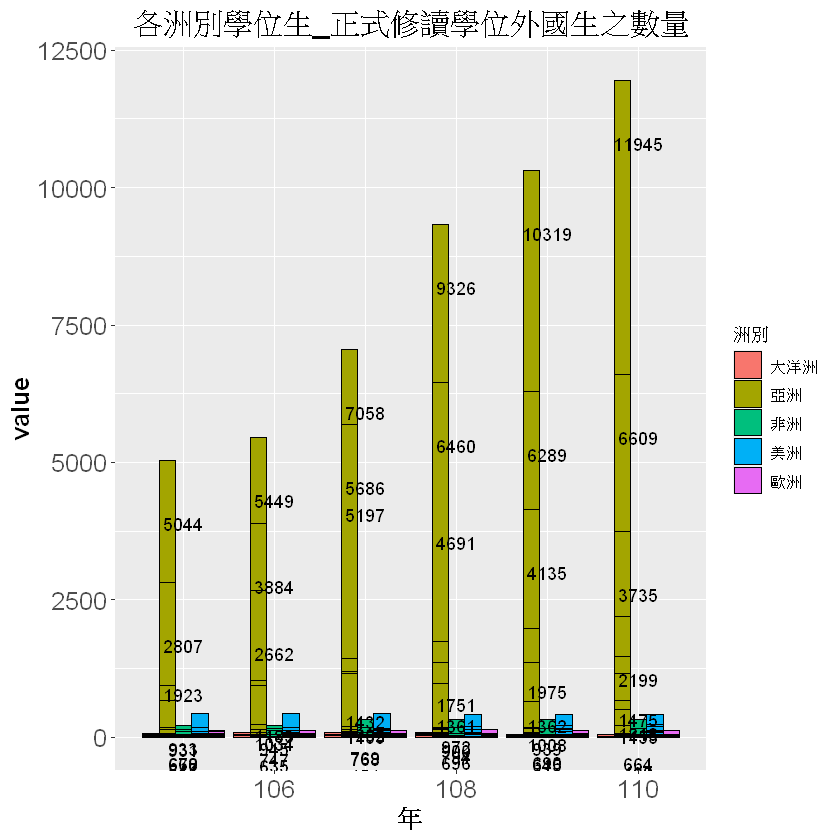

In [9]:
ggplot(df15, aes(x = 年, y = value, fill = 洲別)) + 
 geom_bar(stat = "identity", position = "dodge", colour="black")+
 geom_text(aes(label=value), vjust=5, colour="black")+
 ggtitle("各洲別學位生_正式修讀學位外國生之數量")+
 theme(plot.title = element_text(size = 18, hjust = 0.5),
       axis.title=element_text(size=15,face="bold"),
       axis.text=element_text(size=15))

In [10]:
df1 <- df  %>% 
    group_by(年) %>% 
    summarise(學位生_正式修讀學位外國生加總=sum(學位生_正式修讀學位外國生), 
              學位生_僑生含港澳加總=sum(學位生_僑生.含港澳.),
              學位生_正式修讀學位陸生加總=sum(學位生_正式修讀學位陸生),
              非學位生_外國交換生加總=sum(非學位生_外國交換生),
              非學位生_外國短期研習及個人選讀加總=sum(非學位生_外國短期研習及個人選讀),
              非學位生_大專附設華語文中心學生加總=sum(非學位生_大專附設華語文中心學生),
              非學位生_大陸研修生加總=sum(非學位生_大陸研修生),
              非學位生_大陸研修生加總=sum(非學位生_海青班))
df1

年,學位生_正式修讀學位外國生加總,學位生_僑生含港澳加總,學位生_正式修讀學位陸生加總,非學位生_外國交換生加總,非學位生_外國短期研習及個人選讀加總,非學位生_大專附設華語文中心學生加總,非學位生_大陸研修生加總
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
105,17788,24626,9327,4301,5870,19977,2338
106,21164,25290,9462,4856,8806,23539,2520
107,28389,24575,9006,5242,10630,28399,2369
108,31811,23366,8353,5766,7846,32457,1862
109,32040,24315,6032,2475,3785,20674,1574
110,34535,26555,4293,2475,3785,20145,1175


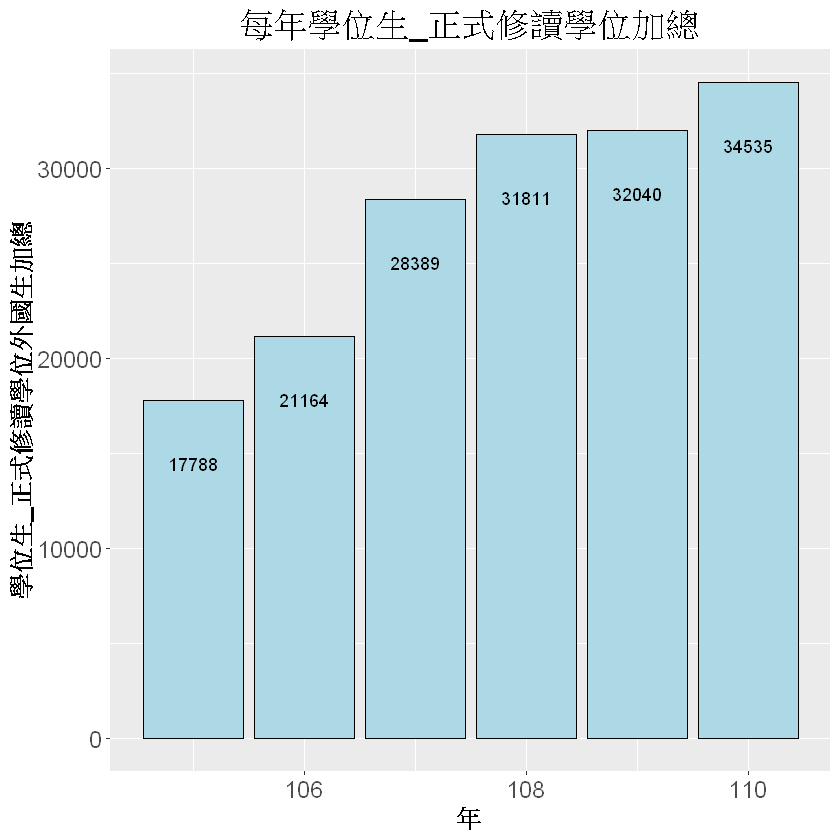

In [11]:
ggplot(df1, aes(x = 年, y = 學位生_正式修讀學位外國生加總)) + 
 geom_bar(stat = "identity", fill="lightblue", colour="black")+
 geom_text(aes(label=學位生_正式修讀學位外國生加總), vjust=5, colour="black")+
 ggtitle("每年學位生_正式修讀學位加總")+
 theme(plot.title = element_text(size = 20, hjust = 0.5),
       axis.title=element_text(size=15,face="bold"),
       axis.text=element_text(size=14))

In [12]:
colors()

[1] "white"                "aliceblue"            "antiquewhite"        
  [4] "antiquewhite1"        "antiquewhite2"        "antiquewhite3"       
  [7] "antiquewhite4"        "aquamarine"           "aquamarine1"         
 [10] "aquamarine2"          "aquamarine3"          "aquamarine4"         
 [13] "azure"                "azure1"               "azure2"              
 [16] "azure3"               "azure4"               "beige"               
 [19] "bisque"               "bisque1"              "bisque2"             
 [22] "bisque3"              "bisque4"              "black"               
 [25] "blanchedalmond"       "blue"                 "blue1"               
 [28] "blue2"                "blue3"                "blue4"               
 [31] "blueviolet"           "brown"                "brown1"              
 [34] "brown2"               "brown3"               "brown4"              
 [37] "burlywood"            "burlywood1"           "burlywood2"          
 [40] "burlywood3"           "burlywood4"           "cadetblue"           
 [43] "cadetblue1"           "cadetblue2"           "cadetblue3"          
 [46] "cadetblue4"           "chartreuse"           "chartreuse1"         
 [49] "chartreuse2"          "chartreuse3"          "chartreuse4"         
 [52] "chocolate"            "chocolate1"           "chocolate2"          
 [55] "chocolate3"           "chocolate4"           "coral"               
 [58] "coral1"               "coral2"               "coral3"              
 [61] "coral4"               "cornflowerblue"       "cornsilk"            
 [64] "cornsilk1"            "cornsilk2"            "cornsilk3"           
 [67] "cornsilk4"            "cyan"                 "cyan1"               
 [70] "cyan2"                "cyan3"                "cyan4"               
 [73] "darkblue"             "darkcyan"             "darkgoldenrod"       
 [76] "darkgoldenrod1"       "darkgoldenrod2"       "darkgoldenrod3"      
 [79] "darkgoldenrod4"       "darkgray"             "darkgreen"           
 [82] "darkgrey"             "darkkhaki"            "darkmagenta"         
 [85] "darkolivegreen"       "darkolivegreen1"      "darkolivegreen2"     
 [88] "darkolivegreen3"      "darkolivegreen4"      "darkorange"          
 [91] "darkorange1"          "darkorange2"          "darkorange3"         
 [94] "darkorange4"          "darkorchid"           "darkorchid1"         
 [97] "darkorchid2"          "darkorchid3"          "darkorchid4"         
[100] "darkred"              "darksalmon"           "darkseagreen"        
[103] "darkseagreen1"        "darkseagreen2"        "darkseagreen3"       
[106] "darkseagreen4"        "darkslateblue"        "darkslategray"       
[109] "darkslategray1"       "darkslategray2"       "darkslategray3"      
[112] "darkslategray4"       "darkslategrey"        "darkturquoise"       
[115] "darkviolet"           "deeppink"             "deeppink1"           
[118] "deeppink2"            "deeppink3"            "deeppink4"           
[121] "deepskyblue"          "deepskyblue1"         "deepskyblue2"        
[124] "deepskyblue3"         "deepskyblue4"         "dimgray"             
[127] "dimgrey"              "dodgerblue"           "dodgerblue1"         
[130] "dodgerblue2"          "dodgerblue3"          "dodgerblue4"         
[133] "firebrick"            "firebrick1"           "firebrick2"          
[136] "firebrick3"           "firebrick4"           "floralwhite"         
[139] "forestgreen"          "gainsboro"            "ghostwhite"          
[142] "gold"                 "gold1"                "gold2"               
[145] "gold3"                "gold4"                "goldenrod"           
[148] "goldenrod1"           "goldenrod2"           "goldenrod3"          
[151] "goldenrod4"           "gray"                 "gray0"               
[154] "gray1"                "gray2"                "gray3"               
[157] "gray4"                "gray5"                "gray6"               
[160] "gray7"              

In [13]:
df2 <- df1 %>% 
        select(年:學位生_正式修讀學位陸生加總)
df2

年,學位生_正式修讀學位外國生加總,學位生_僑生含港澳加總,學位生_正式修讀學位陸生加總
<int>,<int>,<int>,<int>
105,17788,24626,9327
106,21164,25290,9462
107,28389,24575,9006
108,31811,23366,8353
109,32040,24315,6032
110,34535,26555,4293


In [14]:
df3 <- df2 %>%
          gather(學位生_正式修讀學位外國生加總, 
                 學位生_僑生含港澳加總, 
                 學位生_正式修讀學位陸生加總, 
                 key = "var", 
                 value = "value")
df3

年,var,value
<int>,<chr>,<int>
105,學位生_正式修讀學位外國生加總,17788
106,學位生_正式修讀學位外國生加總,21164
107,學位生_正式修讀學位外國生加總,28389
108,學位生_正式修讀學位外國生加總,31811
109,學位生_正式修讀學位外國生加總,32040
110,學位生_正式修讀學位外國生加總,34535
105,學位生_僑生含港澳加總,24626
106,學位生_僑生含港澳加總,25290
107,學位生_僑生含港澳加總,24575


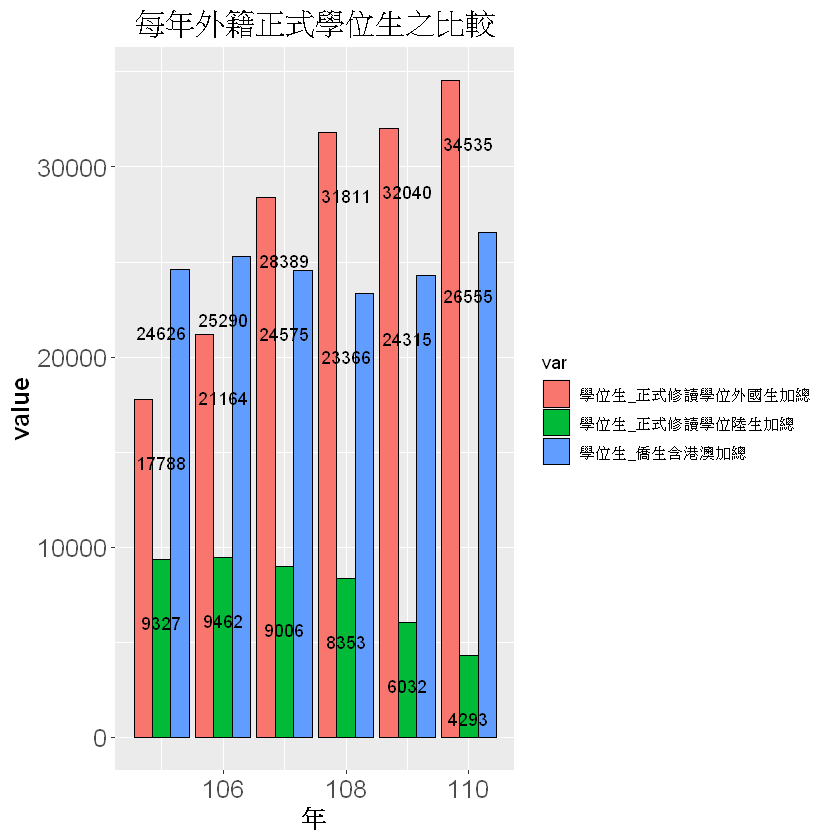

In [15]:
ggplot(df3, aes(x = 年, y = value, fill = var)) + 
 geom_bar(stat = "identity", position = "dodge", colour="black")+
 geom_text(aes(label=value), vjust=5, colour="black")+
 ggtitle("每年外籍正式學位生之比較")+
 theme(plot.title = element_text(size = 18, hjust = 0.5),
       axis.title=element_text(size=15,face="bold"),
       axis.text=element_text(size=15))

In [16]:
df4 <- df1 %>% 
        select(年, 非學位生_外國交換生加總:非學位生_大陸研修生加總)
df4

年,非學位生_外國交換生加總,非學位生_外國短期研習及個人選讀加總,非學位生_大專附設華語文中心學生加總,非學位生_大陸研修生加總
<int>,<int>,<int>,<int>,<int>
105,4301,5870,19977,2338
106,4856,8806,23539,2520
107,5242,10630,28399,2369
108,5766,7846,32457,1862
109,2475,3785,20674,1574
110,2475,3785,20145,1175


In [17]:
df5 <- df4 %>%
          gather(非學位生_外國交換生加總, 
                 非學位生_外國短期研習及個人選讀加總	, 
                 非學位生_大專附設華語文中心學生加總, 
                 非學位生_大陸研修生加總,
                 key = "var", 
                 value = "value")
df5

年,var,value
<int>,<chr>,<int>
105,非學位生_外國交換生加總,4301
106,非學位生_外國交換生加總,4856
107,非學位生_外國交換生加總,5242
108,非學位生_外國交換生加總,5766
109,非學位生_外國交換生加總,2475
110,非學位生_外國交換生加總,2475
105,非學位生_外國短期研習及個人選讀加總,5870
106,非學位生_外國短期研習及個人選讀加總,8806
107,非學位生_外國短期研習及個人選讀加總,10630


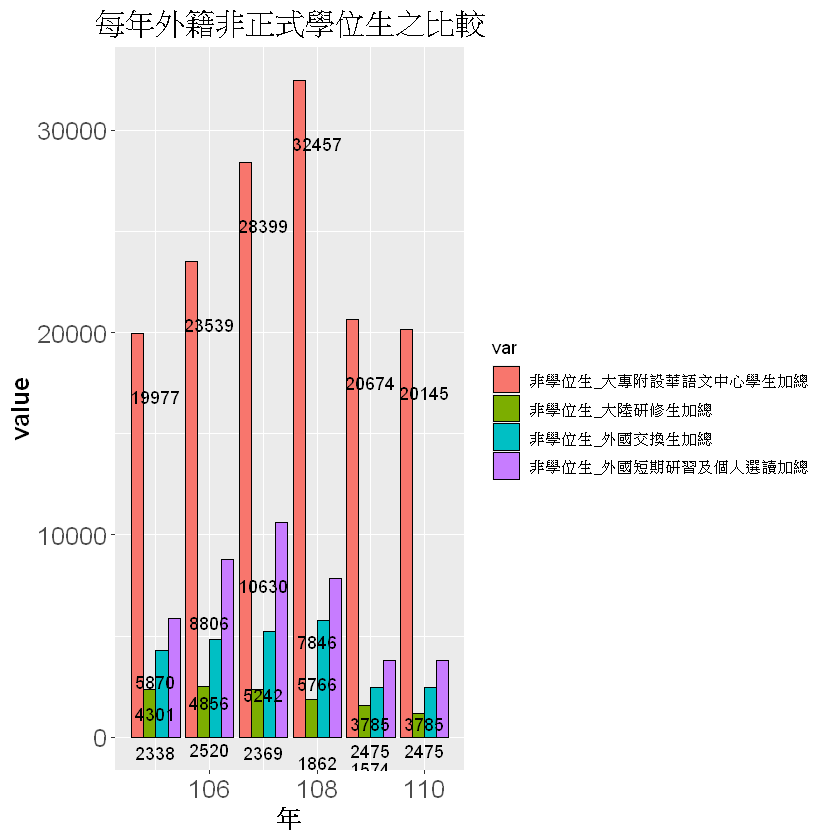

In [18]:
ggplot(df5, aes(x = 年, y = value, fill = var)) + 
 geom_bar(stat = "identity", position = "dodge", colour="black")+
 geom_text(aes(label=value), vjust=5, colour="black")+
 ggtitle("每年外籍非正式學位生之比較")+
 theme(plot.title = element_text(size = 18, hjust = 0.5),
       axis.title=element_text(size=15,face="bold"),
       axis.text=element_text(size=15))

In [19]:
df6 <- df  %>% 
         filter(洲別=="亞洲")
df6

年,洲別,國別,學位生_正式修讀學位外國生,學位生_僑生.含港澳.,學位生_正式修讀學位陸生,非學位生_外國交換生,非學位生_外國短期研習及個人選讀,非學位生_大專附設華語文中心學生,非學位生_大陸研修生,非學位生_海青班,境外專班
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
105,亞洲,中國大陸,0,0,9327,0,0,6,32648,0,0
105,亞洲,馬來西亞,5044,7645,0,53,946,261,0,2215,147
105,亞洲,香港,0,8190,0,149,242,79,0,0,0
105,亞洲,日本,931,177,0,561,1486,4387,0,0,0
105,亞洲,澳門,0,5259,0,19,5,3,0,0,0
105,亞洲,印尼,1923,1208,0,113,197,1626,0,87,0
105,亞洲,越南,2807,358,0,34,277,1512,0,0,354
105,亞洲,南韓,668,188,0,708,441,2568,0,2,0
105,亞洲,泰國,544,240,0,146,246,595,0,0,0


In [20]:
df7 <- df6 %>% 
         group_by(年, 國別) %>% 
         summarise(學位生_正式修讀學位外國生 = sum(學位生_正式修讀學位外國生))
df7 <- df7 %>% 
        arrange(desc(df7$學位生_正式修讀學位外國生))
head(df7, 10)

`summarise()` has grouped output by '年'. You can override using the `.groups` argument.


年,國別,學位生_正式修讀學位外國生
<int>,<chr>,<int>
110,越南,11945
109,越南,10319
108,越南,9326
107,越南,7058
110,印尼,6609
108,印尼,6460
109,印尼,6289
107,印尼,5686
106,馬來西亞,5449


In [21]:
df8 <- df %>% 
        mutate(學位生總和=df$學位生_正式修讀學位外國生+df$學位生_僑生.含港澳.+df$學位生_正式修讀學位陸生,
               非學位生總和=df$非學位生_外國交換生+df$非學位生_外國短期研習及個人選讀+df$非學位生_大專附設華語文中心學生+df$非學位生_大陸研修生+df$非學位生_海青班)
df8

年,洲別,國別,學位生_正式修讀學位外國生,學位生_僑生.含港澳.,學位生_正式修讀學位陸生,非學位生_外國交換生,非學位生_外國短期研習及個人選讀,非學位生_大專附設華語文中心學生,非學位生_大陸研修生,非學位生_海青班,境外專班,學位生總和,非學位生總和
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
105,亞洲,中國大陸,0,0,9327,0,0,6,32648,0,0,9327,32654
105,亞洲,馬來西亞,5044,7645,0,53,946,261,0,2215,147,12689,3475
105,亞洲,香港,0,8190,0,149,242,79,0,0,0,8190,470
105,亞洲,日本,931,177,0,561,1486,4387,0,0,0,1108,6434
105,亞洲,澳門,0,5259,0,19,5,3,0,0,0,5259,27
105,亞洲,印尼,1923,1208,0,113,197,1626,0,87,0,3131,2023
105,亞洲,越南,2807,358,0,34,277,1512,0,0,354,3165,1823
105,亞洲,南韓,668,188,0,708,441,2568,0,2,0,856,3719
105,亞洲,泰國,544,240,0,146,246,595,0,0,0,784,987


In [22]:
df9 <- read.csv("大專院校畢業僑生人數.csv")
df9

學年度,總計,亞洲,美洲,歐洲,大洋洲,非洲
<int>,<int>,<int>,<int>,<int>,<int>,<int>
95,1833,1685,118,1,4,25
96,1875,1689,141,2,9,34
97,1665,1519,120,1,8,17
98,1815,1681,107,0,8,19
99,2160,2004,120,3,8,25
100,2376,2212,130,3,8,23
101,2709,2550,132,2,7,18
102,2685,2524,130,3,8,20
103,1394,1224,145,2,5,18


In [23]:
str(df9)

'data.frame':	15 obs. of  7 variables:
 $ 學年度: int  95 96 97 98 99 100 101 102 103 104 ...
 $ 總計  : int  1833 1875 1665 1815 2160 2376 2709 2685 1394 1721 ...
 $ 亞洲  : int  1685 1689 1519 1681 2004 2212 2550 2524 1224 1505 ...
 $ 美洲  : int  118 141 120 107 120 130 132 130 145 165 ...
 $ 歐洲  : int  1 2 1 0 3 3 2 3 2 6 ...
 $ 大洋洲: int  4 9 8 8 8 8 7 8 5 12 ...
 $ 非洲  : int  25 34 17 19 25 23 18 20 18 33 ...


In [24]:
summary(df9)

     學年度           總計           亞洲           美洲            歐洲      
 Min.   : 95.0   Min.   :1394   Min.   :1224   Min.   : 86.0   Min.   :0.000  
 1st Qu.: 98.5   1st Qu.:1780   1st Qu.:1636   1st Qu.:113.0   1st Qu.:2.000  
 Median :102.0   Median :2160   Median :2004   Median :130.0   Median :2.000  
 Mean   :102.0   Mean   :2621   Mean   :2467   Mean   :123.9   Mean   :2.733  
 3rd Qu.:105.5   3rd Qu.:2697   3rd Qu.:2537   3rd Qu.:132.0   3rd Qu.:3.000  
 Max.   :109.0   Max.   :5421   Max.   :5299   Max.   :165.0   Max.   :8.000  
     大洋洲            非洲      
 Min.   : 4.000   Min.   :12.00  
 1st Qu.: 5.500   1st Qu.:15.00  
 Median : 8.000   Median :18.00  
 Mean   : 7.333   Mean   :20.07  
 3rd Qu.: 8.000   3rd Qu.:24.00  
 Max.   :12.000   Max.   :34.00  

In [25]:
df9 <- tail(df9)
df9

,學年度,總計,亞洲,美洲,歐洲,大洋洲,非洲
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
10,104,1721,1505,165,6,12,33
11,105,1744,1590,130,3,6,15
12,106,2178,2021,132,2,11,12
13,107,5421,5299,94,8,7,13
14,108,4948,4817,108,3,5,15
15,109,4784,4678,86,2,4,14


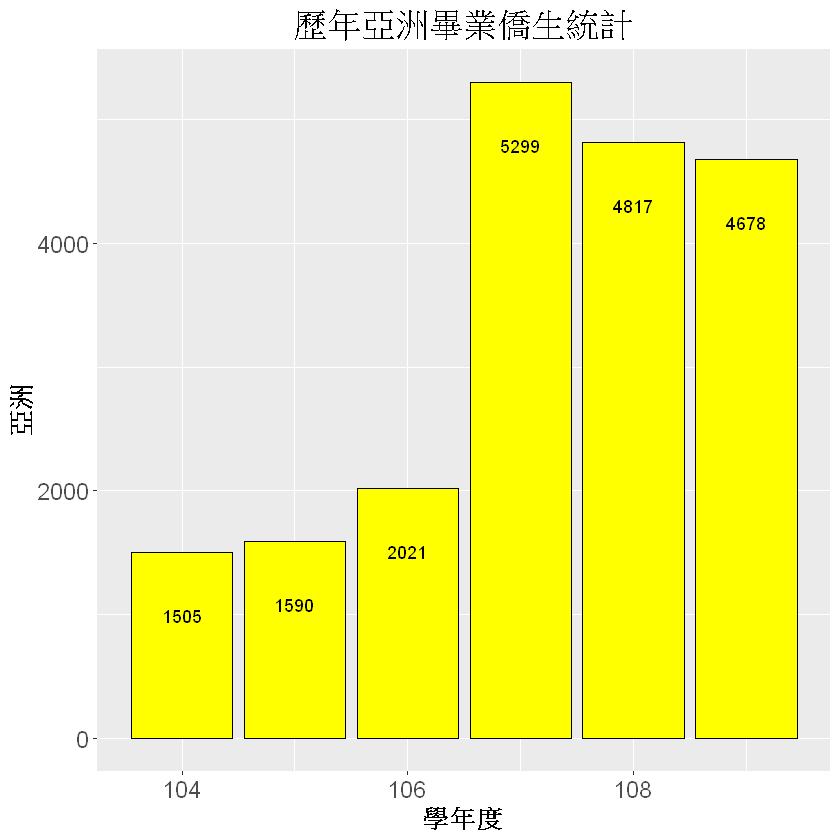

In [26]:
ggplot(df9, aes(x = 學年度, y = 亞洲)) + 
 geom_bar(stat = "identity", fill="yellow", colour="black")+
 geom_text(aes(label=亞洲), vjust=5, colour="black")+
 ggtitle("歷年亞洲畢業僑生統計")+
 theme(plot.title = element_text(size = 20, hjust = 0.5),
       axis.title=element_text(size=15,face="bold"),
       axis.text=element_text(size=14))

In [27]:
df10 <- df9 %>%
         select(學年度, 亞洲:非洲)

df10 <- df10 %>% 
         gather(亞洲, 
                 美洲	, 
                 歐洲, 
                 大洋洲,
                 非洲,
                 key = "var", 
                 value = "value")
df10

學年度,var,value
<int>,<chr>,<int>
104,亞洲,1505
105,亞洲,1590
106,亞洲,2021
107,亞洲,5299
108,亞洲,4817
109,亞洲,4678
104,美洲,165
105,美洲,130
106,美洲,132


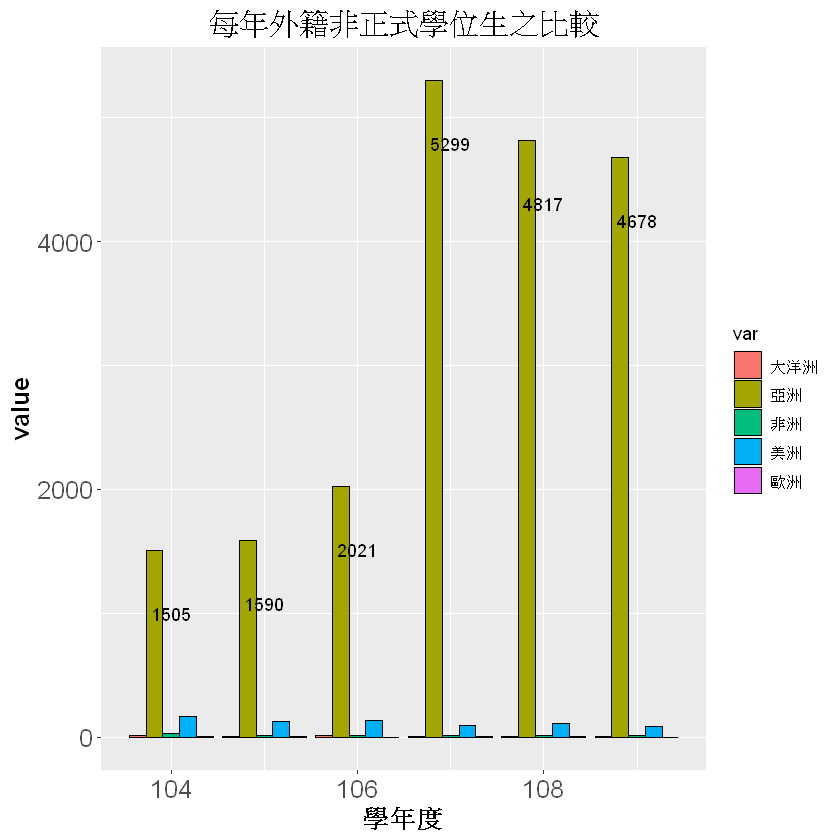

In [28]:
ggplot(df10, aes(x = 學年度, y = value, fill = var)) + 
 geom_bar(stat = "identity", position = "dodge", colour="black")+
 geom_text(aes(label=value), vjust=5, colour="black")+
 ggtitle("每年外籍非正式學位生之比較")+
 theme(plot.title = element_text(size = 18, hjust = 0.5),
       axis.title=element_text(size=15,face="bold"),
       axis.text=element_text(size=15))

In [29]:
df11 <- read.csv("按性別分之大專校院在學僑生人數.csv")
df11

學年度,總在學人數,男生,男生比例,女生,女生比例
<int>,<int>,<int>,<chr>,<int>,<chr>
101,15204,7927,52%,7277,48%
102,17055,8869,52%,8186,48%
103,20053,10559,53%,9494,47%
104,22830,12036,54%,10794,47%
105,24528,12925,53%,11603,47%
106,25182,13210,52%,11972,48%
107,24451,12618,52%,11833,48%
108,28745,14758,51%,13987,49%
109,30502,15503,51%,14999,49%


In [30]:
str(df11)

'data.frame':	10 obs. of  6 variables:
 $ 學年度    : int  101 102 103 104 105 106 107 108 109 110
 $ 總在學人數: int  15204 17055 20053 22830 24528 25182 24451 28745 30502 33489
 $ 男生      : int  7927 8869 10559 12036 12925 13210 12618 14758 15503 17060
 $ 男生比例  : chr  "52%" "52%" "53%" "54%" ...
 $ 女生      : int  7277 8186 9494 10794 11603 11972 11833 13987 14999 16429
 $ 女生比例  : chr  "48%" "48%" "47%" "47%" ...


In [31]:
summary(df11)

     學年度        總在學人數         男生         男生比例        
 Min.   :101.0   Min.   :15204   Min.   : 7927   Length:10         
 1st Qu.:103.2   1st Qu.:20747   1st Qu.:10928   Class :character  
 Median :105.5   Median :24490   Median :12772   Mode  :character  
 Mean   :105.5   Mean   :24204   Mean   :12546                     
 3rd Qu.:107.8   3rd Qu.:27854   3rd Qu.:14371                     
 Max.   :110.0   Max.   :33489   Max.   :17060                     
      女生         女生比例        
 Min.   : 7277   Length:10         
 1st Qu.: 9819   Class :character  
 Median :11718   Mode  :character  
 Mean   :11657                     
 3rd Qu.:13483                     
 Max.   :16429                     

In [32]:
df11 <- tail(df11)
df11

,學年度,總在學人數,男生,男生比例,女生,女生比例
,<int>,<int>,<int>,<chr>,<int>,<chr>
5,105,24528,12925,53%,11603,47%
6,106,25182,13210,52%,11972,48%
7,107,24451,12618,52%,11833,48%
8,108,28745,14758,51%,13987,49%
9,109,30502,15503,51%,14999,49%
10,110,33489,17060,51%,16429,49%


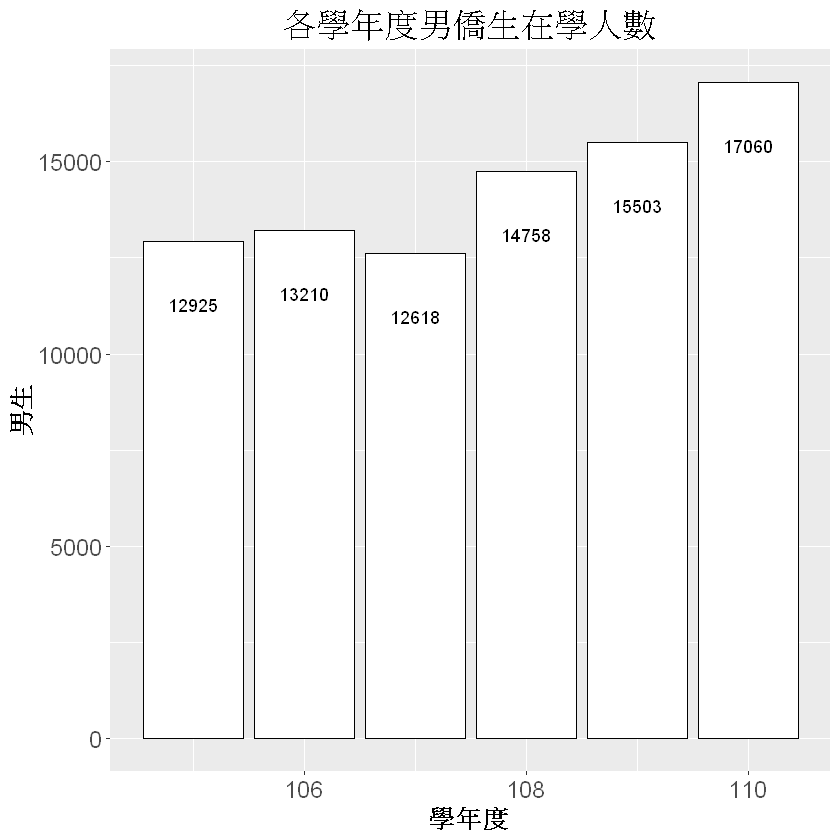

In [33]:
ggplot(df11, aes(x = 學年度, y = 男生)) + 
 geom_bar(stat = "identity", fill="white", colour="black")+
 geom_text(aes(label=男生), vjust=5, colour="black")+
 ggtitle("各學年度男僑生在學人數")+
 theme(plot.title = element_text(size = 20, hjust = 0.5),
       axis.title=element_text(size=15,face="bold"),
       axis.text=element_text(size=14))

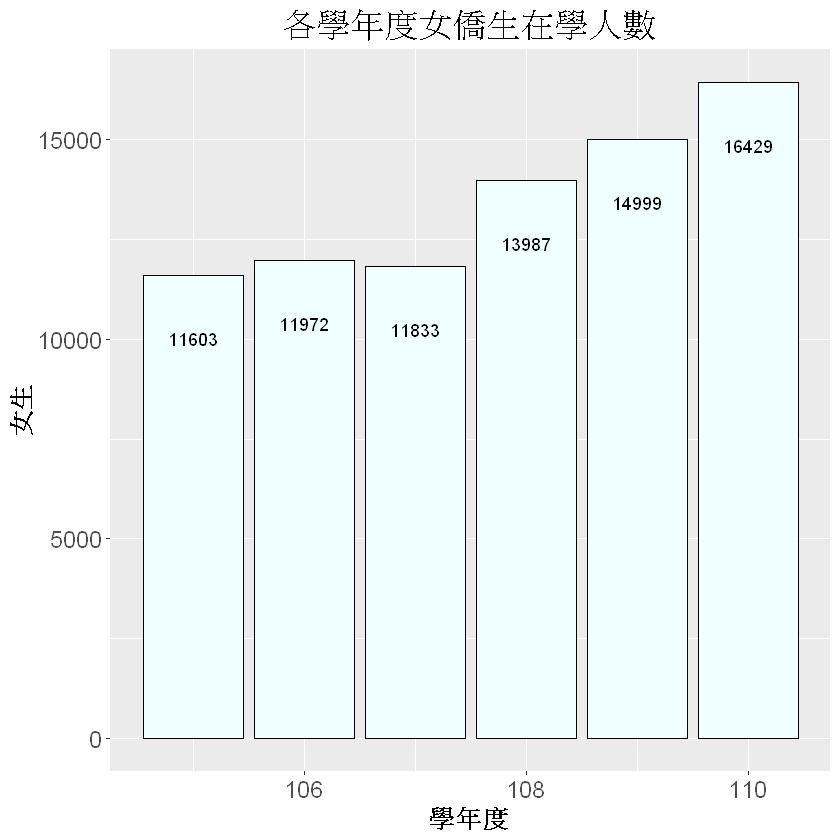

In [34]:
ggplot(df11, aes(x = 學年度, y = 女生)) + 
 geom_bar(stat = "identity", fill="azure", colour="black")+
 geom_text(aes(label=女生), vjust=5, colour="black")+
 ggtitle("各學年度女僑生在學人數")+
 theme(plot.title = element_text(size = 20, hjust = 0.5),
       axis.title=element_text(size=15,face="bold"),
       axis.text=element_text(size=14))

In [35]:
df12 <- df11 %>%
         select(學年度, 男生, 女生)

df12 <- df12 %>% 
         gather( 男生, 
                 女生	, 
                 key = "var", 
                 value = "value")
df12

學年度,var,value
<int>,<chr>,<int>
105,男生,12925
106,男生,13210
107,男生,12618
108,男生,14758
109,男生,15503
110,男生,17060
105,女生,11603
106,女生,11972
107,女生,11833


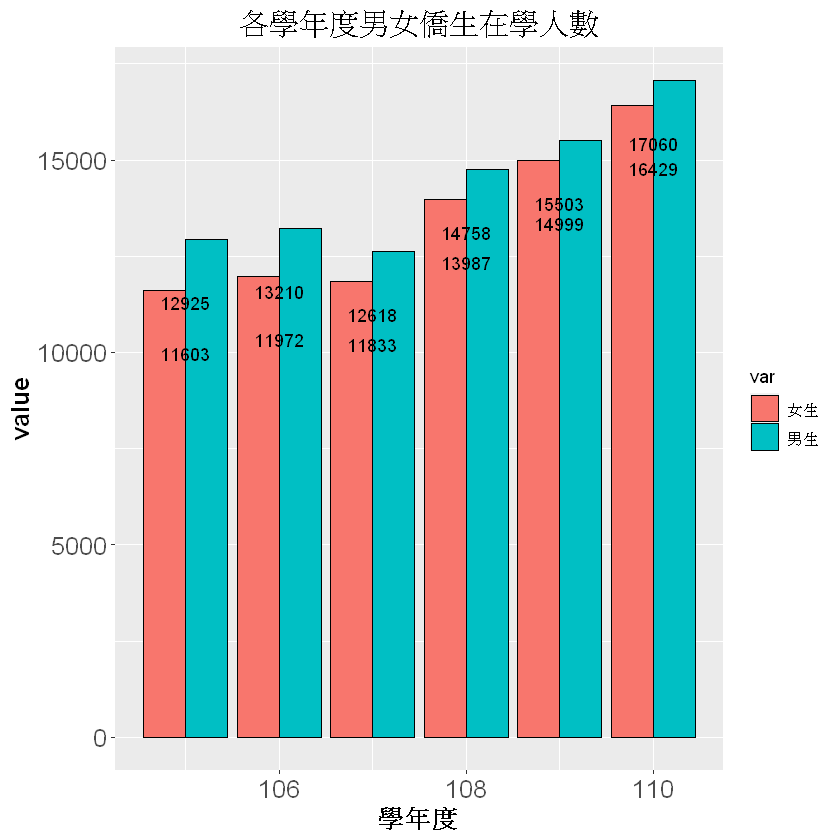

In [36]:
ggplot(df12, aes(x = 學年度, y = value, fill = var)) + 
 geom_bar(stat = "identity", position = "dodge", colour="black")+
 geom_text(aes(label=value), vjust=5, colour="black")+
 ggtitle("各學年度男女僑生在學人數")+
 theme(plot.title = element_text(size = 18, hjust = 0.5),
       axis.title=element_text(size=15,face="bold"),
       axis.text=element_text(size=15))

In [37]:
df12 <- read.csv("按身分別之性別統計.csv")
df12

學年度,身分別,男,女,男女合計
<int>,<chr>,<int>,<int>,<int>
102,僑生,685,709,1394
102,港澳生,774,723,1497
102,總計,1459,1432,2891
103,僑生,825,896,1721
103,港澳生,975,853,1828
103,總計,1800,1749,3549
104,僑生,825,896,1721
104,港澳生,975,853,1828
104,總計,1800,1749,3549


In [38]:
df13 <- df12 %>% 
         select(身分別:女)
df13

身分別,男,女
<chr>,<int>,<int>
僑生,685,709
港澳生,774,723
總計,1459,1432
僑生,825,896
港澳生,975,853
總計,1800,1749
僑生,825,896
港澳生,975,853
總計,1800,1749


In [39]:
df14 <- df13 %>% 
         gather( 男, 
                 女, 
                 key = "var", 
                 value = "value")
df14

身分別,var,value
<chr>,<chr>,<int>
僑生,男,685
港澳生,男,774
總計,男,1459
僑生,男,825
港澳生,男,975
總計,男,1800
僑生,男,825
港澳生,男,975
總計,男,1800


In [40]:
df14 <- df14 %>% 
         filter(身分別=="港澳生"|身分別=="僑生")
df14

身分別,var,value
<chr>,<chr>,<int>
僑生,男,685
港澳生,男,774
僑生,男,825
港澳生,男,975
僑生,男,825
港澳生,男,975
僑生,男,803
港澳生,男,1115
僑生,男,1034


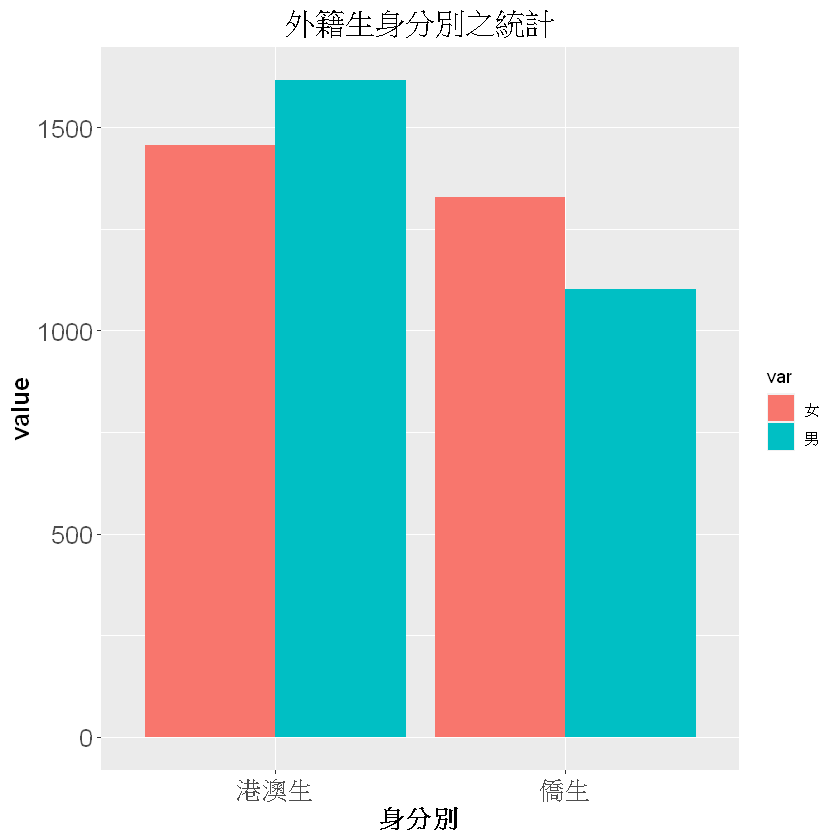

In [41]:
ggplot(df14, aes(x = 身分別, y = value, fill = var)) + 
 geom_bar(stat = "identity", position = "dodge")+
 ggtitle("外籍生身分別之統計")+
 theme(plot.title = element_text(size = 18, hjust = 0.5),
       axis.title=element_text(size=15,face="bold"),
       axis.text=element_text(size=15))